# Delay analysis of Cracows trams

In [0]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv')
df1 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-24.csv')
df = pd.concat([df, df1])

df.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0


In [0]:
df [df.tripId == 6351558574044883205]

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
70,3,2018-07-23 06:01:42,379,Piasta Kołodzieja,21,Kopiec Wandy,2018-07-23 06:00:00,NaN,6351558574044883205,PLANNED,1,2.0
135,6,2018-07-23 06:02:46,382,Kleeberga,21,Kopiec Wandy,2018-07-23 06:01:00,NaN,6351558574044883205,PLANNED,1,3.0
284,12,2018-07-23 06:04:54,388,Dunikowskiego,21,Kopiec Wandy,2018-07-23 06:03:00,NaN,6351558574044883205,PLANNED,1,4.0
414,17,2018-07-23 06:06:40,2539,Rondo Hipokratesa,21,Kopiec Wandy,2018-07-23 06:05:00,NaN,6351558574044883205,PLANNED,1,5.0
493,20,2018-07-23 06:07:43,392,DH Wanda,21,Kopiec Wandy,2018-07-23 06:06:00,NaN,6351558574044883205,PLANNED,1,6.0
697,28,2018-07-23 06:10:39,2745,Rondo Kocmyrzowskie im. Ks. Gorzelanego,21,Kopiec Wandy,2018-07-23 06:09:00,NaN,6351558574044883205,PLANNED,1,7.0
772,31,2018-07-23 06:11:43,418,Os.Zgody,21,Kopiec Wandy,2018-07-23 06:10:00,NaN,6351558574044883205,PLANNED,1,8.0
1007,40,2018-07-23 06:14:58,2744,Plac Centralny im. R.Reagana,21,Kopiec Wandy,2018-07-23 06:13:00,NaN,6351558574044883205,PLANNED,1,9.0
1137,45,2018-07-23 06:16:49,423,Struga,21,Kopiec Wandy,2018-07-23 06:15:00,NaN,6351558574044883205,PLANNED,1,10.0


In [0]:
df.delay.value_counts(normalize=True)

0     0.426905
1     0.344715
2     0.123509
3     0.055987
4     0.025421
5     0.011410
6     0.004852
7     0.002657
8     0.001189
9     0.000867
10    0.000587
14    0.000503
12    0.000475
11    0.000350
13    0.000336
15    0.000154
16    0.000042
19    0.000028
18    0.000014
Name: delay, dtype: float64

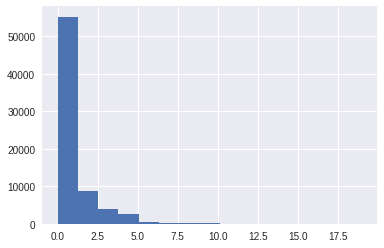

In [0]:
df.delay.hist(bins = 15)

In [0]:
df.delay.describe()

count    71517.000000
mean         1.014039
std          1.357324
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         19.000000
Name: delay, dtype: float64

In [0]:
df.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [0]:
df['direction'].unique()

array(['Kopiec Wandy', 'Walcownia', 'Czerwone Maki P+R', 'Wzgórza K.',
       'Bronowice Małe', 'Salwator', 'Mały Płaszów', 'Os.Piastów',
       'Mistrzejowice', 'Bronowice', 'Kurdwanów P+R', 'Nowy Bieżanów P+R',
       'Krowodrza Górka', 'Cichy Kącik', 'Borek Fałęcki', 'Dworzec Tow.',
       'Prokocim', 'Łagiewniki', 'Cm. Rakowicki', 'Kombinat',
       'Plac Centralny im.R.Reagana'], dtype=object)

In [0]:
pd.factorize([
    '{} {}'.format(7, 'B'),
    '{} {}'.format(7, 'A'),
    '{} {}'.format(10, 'C'),
    '{} {}'.format(10, 'D'),
])[0]

array([0, 1, 2, 3])

In [0]:
df.apply(lambda x: '{} {}'.format(x['number'], x['direction']), axis = 1).head().factorize()[0]

In [0]:
df['plannedTime'] = pd.to_datetime(df['plannedTime'])
df[['plannedTime']].info()

df['hour'] = df['plannedTime'].dt.hour

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144719 entries, 0 to 73201
Data columns (total 1 columns):
plannedTime    144719 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.2 MB


In [0]:
df['delay_secs'] = df['delay'].map(lambda x:x*60)
df['direction_cat'] = df['direction'].factorize()[0]
df['vehicleId'].fillna(-1,inplace=True)
df['seq_num'].fillna(-1,inplace=True)

def gen_id_num_direction(x):
  return '{} {}'.format(x['number'], x['direction'])

df['number_direction_id'] = df.apply(gen_id_num_direction, axis = 1).factorize()[0]

def gen_id_stop_direction(x):
  return '{} {}'.format(x['stop'], x['direction'])

df['stop_direction_id'] = df.apply(gen_id_stop_direction, axis = 1).factorize()[0]


feats = ['number',
         'stop',
         'direction_cat',
         'vehicleId',
         'seq_num',
         'number_direction_id',
         'stop_direction_id',
        ]

X = df [ feats ].values
y = df['delay_secs'].values

# model = RandomForestRegressor(max_depth = 10, n_estimators=50)
model = DecisionTreeRegressor(max_depth = 10, random_state=0)
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error' )
np.mean(scores), np.std(scores)

(-48.22787185865052, 2.819348499094717)